# 选取不同核函数

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs

## 绘图函数

In [2]:
def plot_hyperplane(clf, X, y,
                    h=0.02,
                    draw_sv=True,
                    title='hyperplan'):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0],
                    X[y==label][:, 1],
                    c=colors[label],
                    marker=markers[label])
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')


## 读取数据

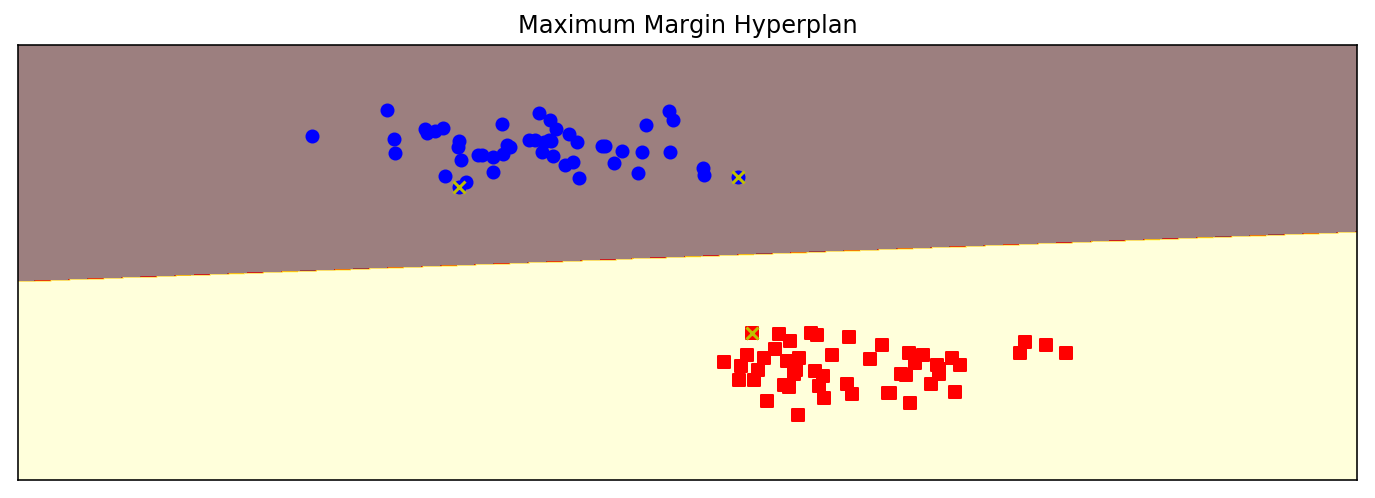

In [3]:
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.3)
clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(X, y)

plt.figure(figsize=(12, 4), dpi=144)
plot_hyperplane(clf, X, y, h=0.01,
                title='Maximum Margin Hyperplan')

## 训练 + 可视化

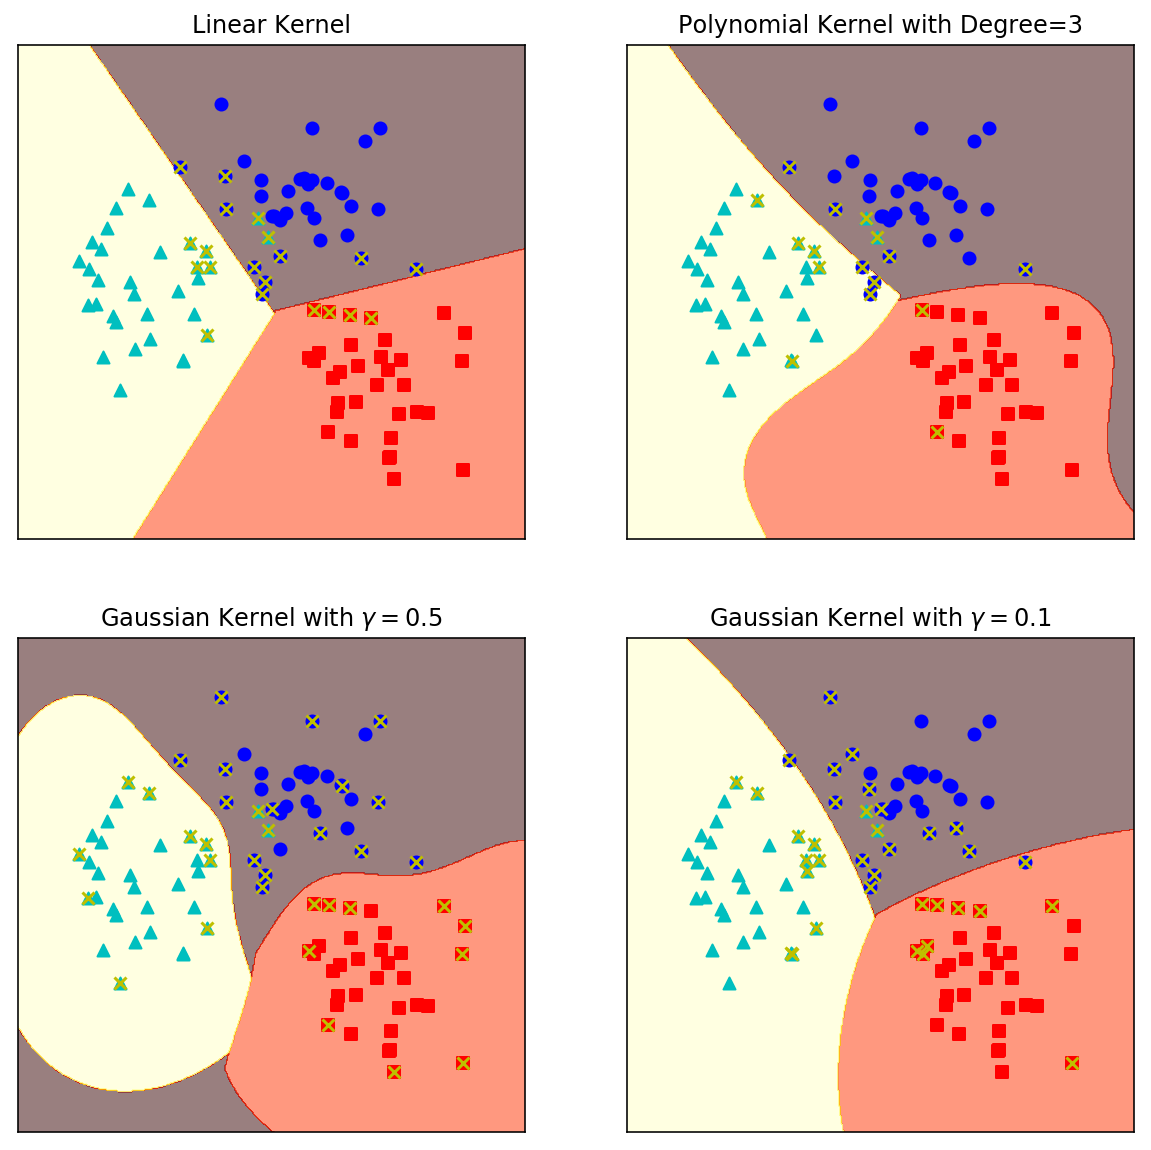

In [4]:
X, y = make_blobs(n_samples=100, centers=3,
                  random_state=0, cluster_std=0.8)
clf_linear = svm.SVC(C=1.0, kernel='linear')
clf_poly = svm.SVC(C=1.0, kernel='poly', degree=3)
clf_rbf = svm.SVC(C=1.0, kernel='rbf', gamma=0.5)
clf_rbf2 = svm.SVC(C=1.0, kernel='rbf', gamma=0.1)

plt.figure(figsize=(10, 10), dpi=144)

clfs = [clf_linear, clf_poly, clf_rbf, clf_rbf2]
titles = ['Linear Kernel',
          'Polynomial Kernel with Degree=3',
          'Gaussian Kernel with $\gamma=0.5$',
          'Gaussian Kernel with $\gamma=0.1$']
for clf, i in zip(clfs, range(len(clfs))):
    clf.fit(X, y)
    plt.subplot(2, 2, i+1)
    plot_hyperplane(clf, X, y, title=titles[i])